<h1><center> Trabajo Práctico 3: Fashion detector </center></h1>

In [1]:
# lib para trabajar con arrays
import numpy as np
# lib para trabajar con dataframe
import pandas as pd 
import itertools
import seaborn as sns

# lib que usamos para mostrar las imágenes
import matplotlib.pyplot as plt

# libs que usamos para construir y entrenar redes neuronales, y que además tiene utilidades para leer sets de 
# imágenes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Convolution2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# libs que usamos para tareas generales de machine learning. En este caso, métricas
from sklearn.metrics import accuracy_score, confusion_matrix

# configuraciócompilern para que las imágenes se vean dentro del notebook
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

# graficar
import plotly.express as px

In [2]:
def plot_train_instrumentation(epochs, data, train_param, val_param):
    
    plt.figure(figsize=(20,16))
    
    plt.plot(epochs, data[train_param], 'blue', label=f'Training ({train_param})')
    plt.plot(epochs, data[val_param], 'orange', label=f'Validation ({val_param})')
    
    plt.title("Training performance")
    plt.xlabel('Epochs')
    plt.ylabel(train_param)
    
    plt.legend()
    plt.show()

In [3]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(d_clases_labels[predicted_label],
                                100*np.max(predictions_array),
                                d_clases_labels[true_label]),
                                color=color)

In [4]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [5]:
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker


def plot_history(history): 
    
    plt.figure(figsize=(20,12), dpi=80)
    
    # números que sean más chicos 
    # https://aprendepython.es/pypi/datascience/matplotlib/
    # Marcas menores en el eje Y: precisión de 2 decimales, tamaño de letra 8 y color azul.
    plt.gca().yaxis.set_minor_formatter('{x:.2f}')
    plt.gca().tick_params(axis='y', which='minor', labelsize=18, labelcolor='lightskyblue')
    
    # https://programmerclick.com/article/41801212257/
    plt.gca().yaxis.set_minor_locator(MultipleLocator(0.01)) 
    plt.gca().yaxis.grid(which='minor', linestyle='dashed', color='lightskyblue')

    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title('Accuracy over train epochs', fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Epoch', fontsize=20)
    plt.xticks(range(len(history.epoch)), fontsize = 20)
    plt.yticks( fontsize = 20) 
    plt.legend(loc='upper left', fontsize = 20)
    # https://www.delftstack.com/es/howto/matplotlib/how-to-show-pyplot-grid-in-matplotlib/
    plt.grid(axis='both',linestyle='dotted', color='gray', linewidth=1, ) # grilla de fondo
        
    plt.show()

In [6]:
#https://www.kaggle.com/code/fuzzywizard/fashion-mnist-cnn-keras-accuracy-93/notebook#6)-Confusion-Matrix
# Para plotear la matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
                                                            # https://stackoverflow.com/questions/14852821/aligning-rotated-xticklabels-with-their-respective-xticks
                                                             #ha = ['right', 'center', 'left']
    plt.xticks(tick_marks, classes, rotation=45, fontsize=15, ha='right')
    plt.yticks(tick_marks, classes, fontsize=15)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=18)

    plt.tight_layout()
    plt.ylabel('Etiqueta verdadera', fontsize=20) 
    plt.xlabel('Etiqueta predicha', fontsize=20)

In [7]:
# 1
# Predict the values from the validation dataset
# Y_pred = model.predict(y_validation)
# Y_pred

In [8]:
# 2
# Convert predictions classes to one hot vectors 
# Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Y_pred_classes 

In [9]:
# 3
# y_lab_categorical = to_categorical(y_lab, num_classes=10)

In [10]:
# 4
# print(y_lab_categorical.shape)

In [11]:
# 5
# Convert validation observations to one hot vectors
#Y_true = np.array(y_lab, axis = -1) #dtype=np.int64)
# Y_true = np.argmax(y_lab_categorical,axis = 1) 
# Y_true

In [12]:
# 6
# confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# confusion_mtx

In [13]:
# 7
# plot_confusion_matrix(confusion_mtx, a_clases_labels)

In [14]:
# Método para armar la matriz de confusión y luego plotearla
# armar y protear matriz de confusión
def a_p_confusion_matrix(model, validation, lab_validation,
                         classes):

    # Predict the values from the validation dataset
    Y_pred = model.predict(validation)
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1)
    # Agregado para que ande la linea siguente
    y_lab_categorical = to_categorical(lab_validation, num_classes=10)
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(y_lab_categorical,axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    plot_confusion_matrix(confusion_mtx, classes)

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

# esto es para que los calores de los modelos den siempre igual
np.random.seed(3)
tf.random.set_seed(3)

(x_train, x_lab), (y_validation, y_lab) = fashion_mnist.load_data()

<h1><center>1. Análisis exploratorio</center></h1>

Presentación → 1.1 Volumetría de los datos

In [16]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
y_validation = y_validation.reshape(y_validation.shape[0], 28, 28, 1).astype('float32')
print("x_train shape {}".format(x_train.shape))
print("y_validation shape {}".format(y_validation.shape))

x_train shape (60000, 28, 28, 1)
y_validation shape (10000, 28, 28, 1)


El data set de train cuenta con 60000 imágenes de 28x28 pixeles.

El data set de validation cuenta con 10000 imágenes de 28x28 pixeles.

El target está compuesto por 10 clases, con valor entre 0 y 9.
A continuación, detallaremos que significa cada valor:

| Label | Clase |
| -- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover|
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


In [17]:
# Create a dictionary for each type of label 
d_clases_labels = {0 : "camiseta/top", 1: "Pantalón", 2: "Pulover", 3: "Vestido", 4: "Saco",
                   5: "Sandalia", 6: "Camisa", 7: "Zapatilla", 8: "Bolso", 9: "Botas"}

In [18]:
# Create a array for each type of label 
a_clases_labels = ["camiseta/top", "Pantalón", "Pulover", "Vestido", "Saco", "Sandalia", 
                   "Camisa", "Zapatilla", "Bolso", "Botas"]

<h3>Normalizamos las imágenes</h3>

In [19]:
#Los valores de la imagen se encuentran entre 0 y 255, por lo cual es necesario normalizar.
x_train = keras.utils.normalize(x_train, axis = 1)

y_validation = keras.utils.normalize(y_validation, axis = 1)

### Mostramos algunas imágenes del data set de train

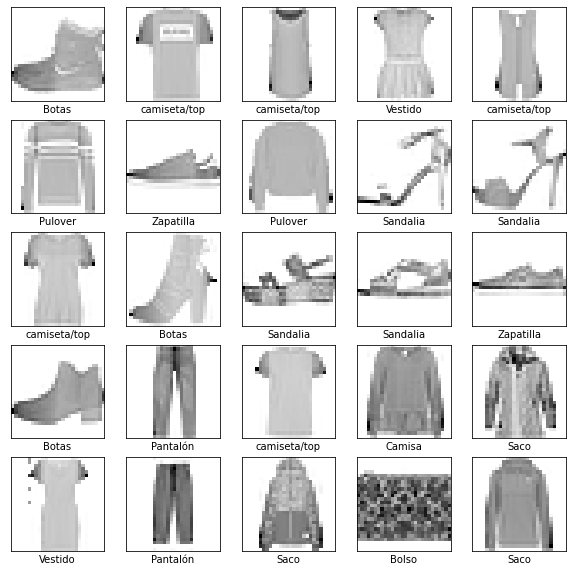

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary) #cmap='gray')
    plt.xlabel(d_clases_labels[x_lab[i]])
plt.show()

### Mostramos algunas imágenes del data set de validation

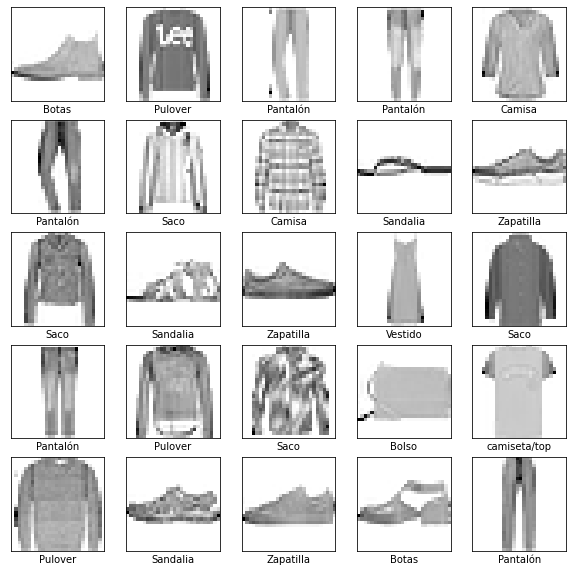

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(y_validation[i], cmap=plt.cm.binary)
    plt.xlabel(d_clases_labels[y_lab[i]])
plt.show()

### Distribución de la variable a predecir

In [22]:
# Presentación → 1.3 Distribución de la variable a predecir

In [23]:
# transformamos el array en un data frame de panda
df_train = pd.DataFrame(x_lab).rename(columns={0:'x_lab'})
# cambiamos los números de las clases po sus nombres
df_train['x_lab'] = df_train['x_lab'].map(d_clases_labels,
                             na_action=None)

In [24]:
# Presentación → 1.3 Distribución de la variable a predecir
df = px.data.tips()
fig = px.histogram(df_train, 
                   x="x_lab", 
                   color="x_lab", 
                   title='Distribución de la variable en train', 
                   labels={'x_lab':'Target'},
                  category_orders=dict(x_lab=d_clases_labels),
                  text_auto=True)
fig.update_layout(bargap=0.2)
fig.show()

In [25]:
# transformamos el array en un data frame de panda
df_validation = pd.DataFrame(y_lab).rename(columns={0:'y_lab'})
# cambiamos los números de las clases po sus nombres
df_validation['y_lab'] = df_validation['y_lab'].map(d_clases_labels,
                             na_action=None)

In [26]:
# Presentación → 1.3 Distribución de la variable a predecir
df = px.data.tips()
fig = px.histogram(df_validation, 
                   x="y_lab", 
                   color="y_lab", 
                   title='Distribución de la variable en validation', 
                   labels={'y_lab':'Target'},
                  category_orders=dict(y_lab=d_clases_labels),
                  text_auto=True)

fig.update_layout(bargap=0.2)
fig.show()

<h1><center>2. Machine Learning</center></h1>

<h3>2. I) MLP simple</h3>

In [27]:
#Definiendo modelo
model = Sequential()
model.add(Flatten(input_shape=((28, 28, 1))))
#Capa oculta con 200 neuronas
model.add(Dense(128, activation ="relu"))
model.add(Dense(10, activation ="softmax"))

#compilar el modelo
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(x_train, x_lab, epochs = 20, validation_data=(y_validation, y_lab))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5037 - accuracy: 0.8192 - val_loss: 0.4537 - val_accuracy: 0.8326
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3740 - accuracy: 0.8643 - val_loss: 0.3818 - val_accuracy: 0.8620
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3324 - accuracy: 0.8777 - val_loss: 0.3764 - val_accuracy: 0.8604
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3074 - accuracy: 0.8869 - val_loss: 0.3509 - val_accuracy: 0.8735
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2883 - accuracy: 0.8926 - val_loss: 0.3383 - val_accuracy: 0.8777
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2722 - accuracy: 0.8986 - val_loss: 0.3411 - val_accuracy: 0.8772
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2603 - accuracy: 0.9029 - val_loss: 0.3265 - val_accuracy:

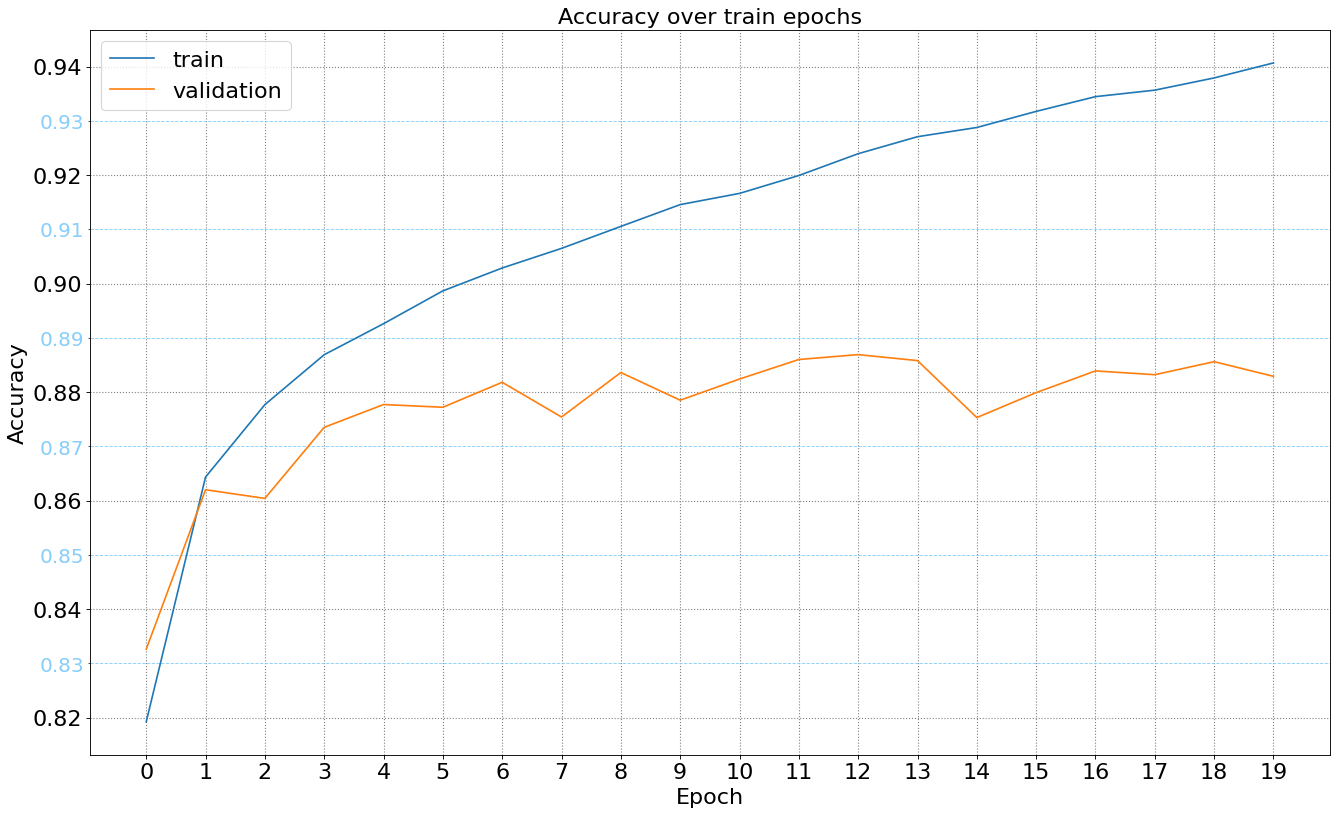

In [30]:
plot_history(history)

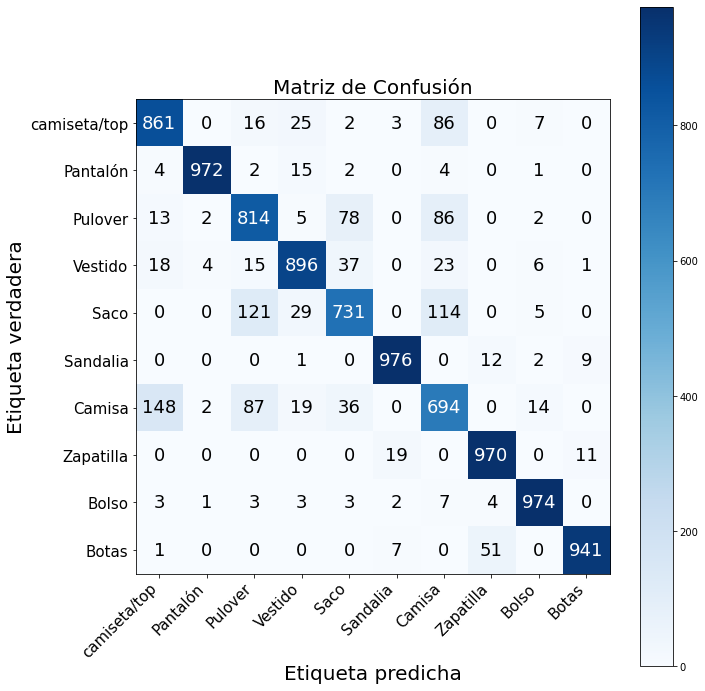

In [31]:
a_p_confusion_matrix(model, y_validation, y_lab, a_clases_labels)

### Conclusión

podemos notar que en la epoca  2/20 el accuracy de train y test eran muy cercanos

train accuracy: 0.8643 
test accuracy: 0.8620
y luego comienza a sobre entrenar

### Visualizamos la predicción para cada clase en particular

In [32]:
predictions = model.predict(y_validation)

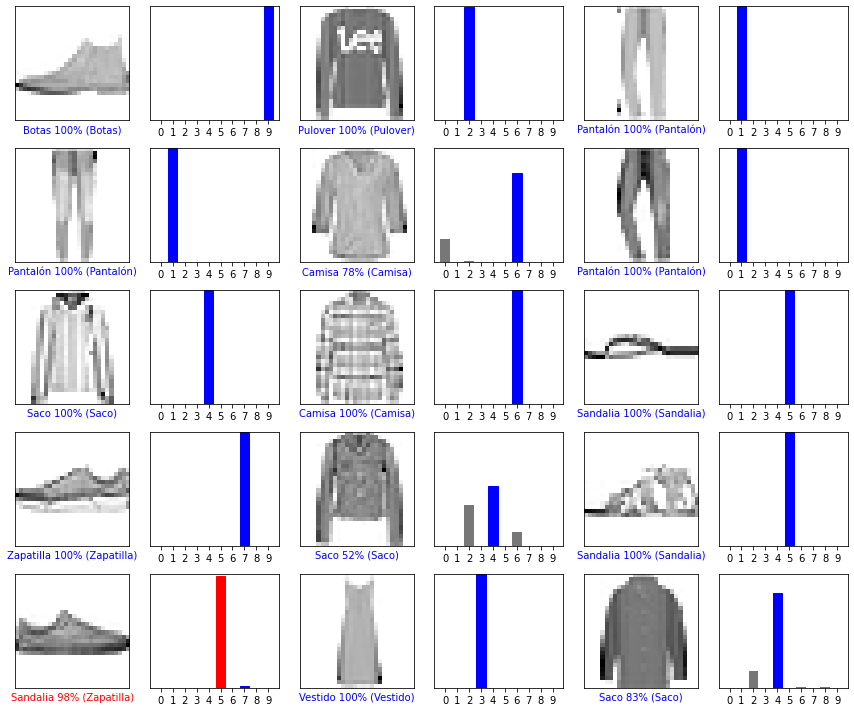

In [33]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_lab, y_validation)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_lab)
plt.tight_layout()
plt.show()

<h3>2. II) Red Convolucional</h3>

In [34]:
# el shape de los inputs es alto_imagen * ancho_imagen * cantidad_colores
model_rc = Sequential([
    
    Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'),
    Dropout(0.2),

    Convolution2D(32, 3, 3, activation='relu'),
    Dropout(0.2),
    
    Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax'),
])
model_rc.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',],)

In [35]:
model_rc.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 32)          320       
                                                                 
 dropout (Dropout)           (None, 9, 9, 32)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 dropout_1 (Dropout)         (None, 3, 3, 32)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 32)          9248      
                                                                 
 dropout_2 (Dropout)         (None, 1, 1, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 32)               

In [36]:
#como esta compuesto un elemento del train
#x_train_m[0]

In [37]:
#como esta compuesto un elemento del lab
#x_lab[0]

In [38]:
#https://programmerclick.com/article/19151150055/
#Para convertir los datos en la memoria en Dataset
#train_dataset = tf.data.Dataset.from_tensor_slices((x_train, x_lab)).batch(64)

#test_dataset = tf.data.Dataset.from_tensor_slices((y_validation, y_lab)).batch(64)

In [39]:
history_rc = model_rc.fit(x_train, x_lab, epochs=20, batch_size=32, validation_data=(y_validation, y_lab))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7536 - accuracy: 0.7139 - val_loss: 0.4915 - val_accuracy: 0.8126
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5299 - accuracy: 0.8039 - val_loss: 0.4363 - val_accuracy: 0.8360
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4801 - accuracy: 0.8214 - val_loss: 0.4080 - val_accuracy: 0.8437
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4543 - accuracy: 0.8313 - val_loss: 0.3812 - val_accuracy: 0.8558
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4331 - accuracy: 0.8372 - val_loss: 0.3782 - val_accuracy: 0.8574
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4199 - accuracy: 0.8417 - val_loss: 0.3621 - val_accuracy: 0.8605
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4102 - accuracy: 0.8458 - val_loss: 0.3645 - val_accuracy:

In [40]:
# plt.plot(history_rc.history['accuracy'], label='train')
# plt.plot(history_rc.history['val_accuracy'], label='validation')
# plt.title('Accuracy over train epochs')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(loc='upper left')
# plt.show()

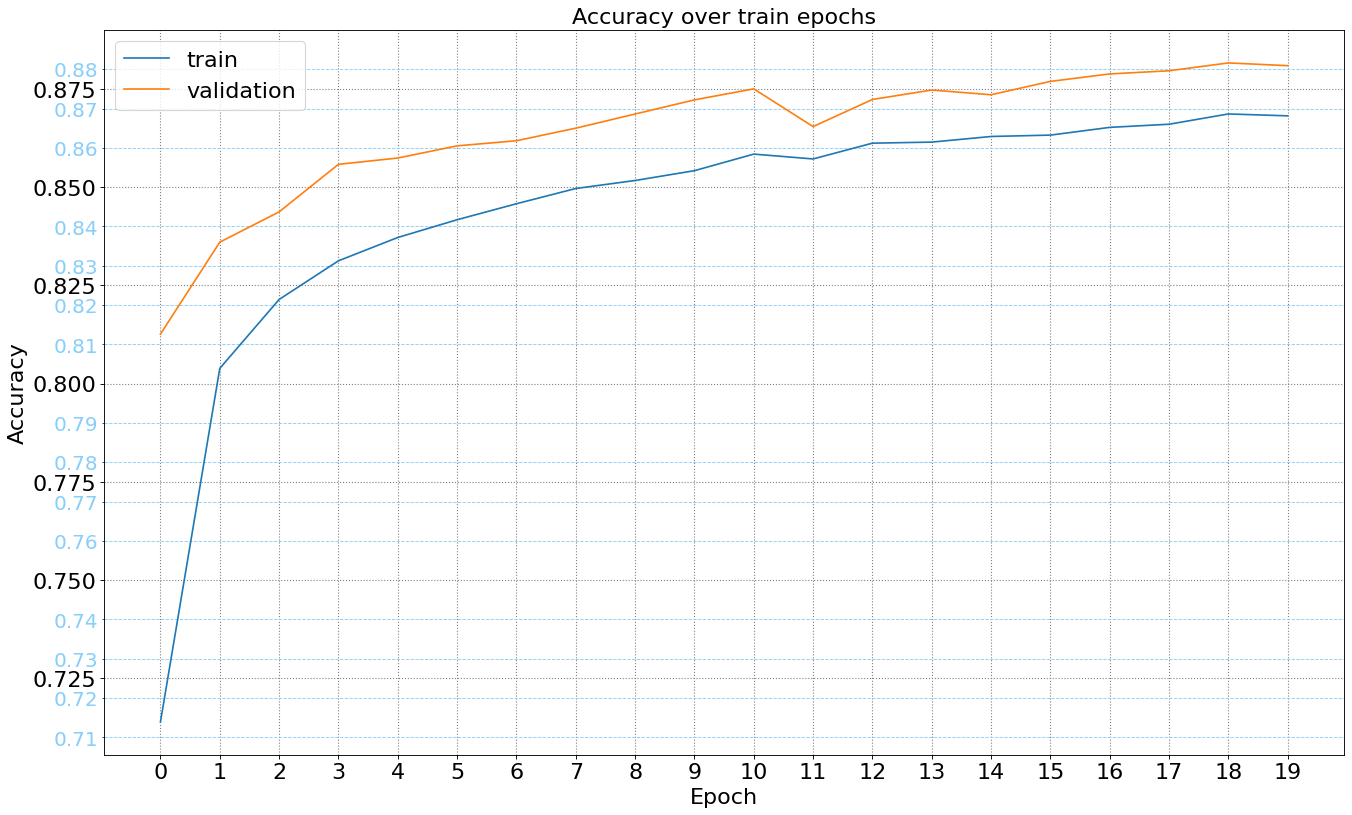

In [41]:
plot_history(history_rc)

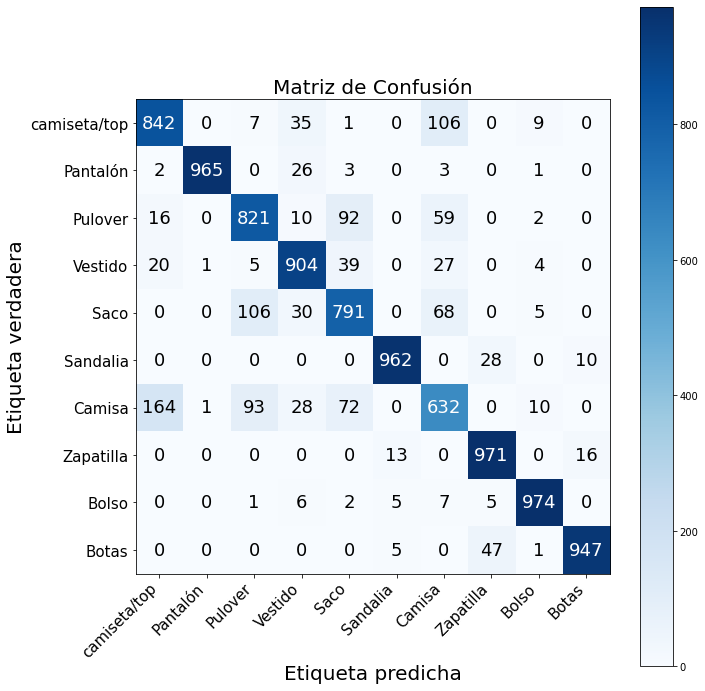

In [42]:
a_p_confusion_matrix(model_rc, y_validation, y_lab, a_clases_labels)

In [43]:
predictions_rc = model_rc.predict(y_validation)

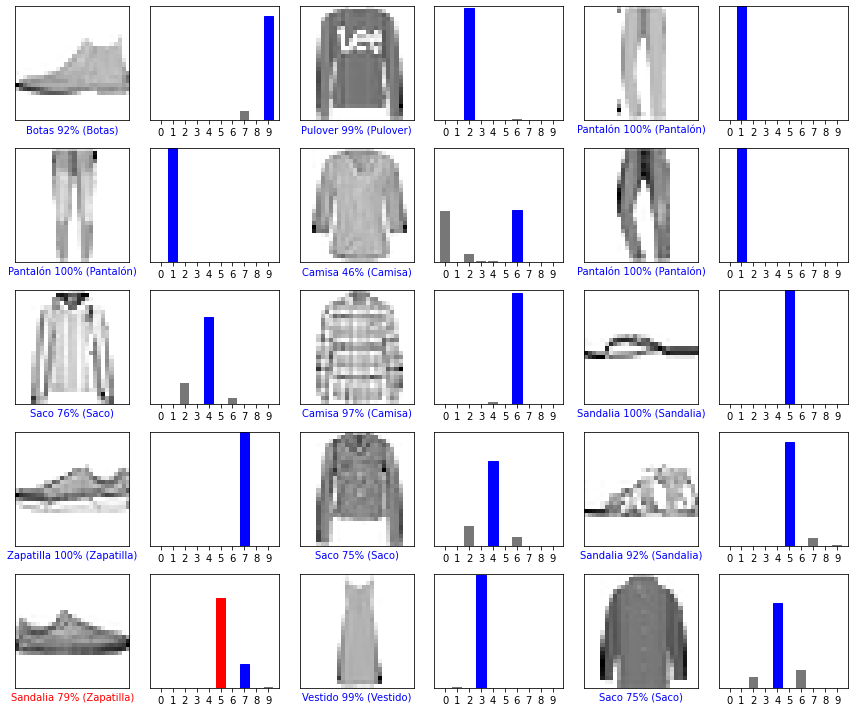

In [44]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_rc[i], y_lab, y_validation)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_rc[i], y_lab)
plt.tight_layout()
plt.show()

## Tecnica de aumentacion de datos

In [45]:
x_train_m = x_train

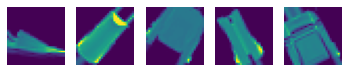

In [46]:
# Create data augmentation object
data_augmentor = ImageDataGenerator(rotation_range=60, 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1,
                                    brightness_range=(0.5, 1.5),
                                    horizontal_flip=True,)
# fit the training data
data_augmentor.fit(x_train_m)
augment = data_augmentor.flow(x_train_m[0:9], batch_size=1)

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.imshow(augment.next().squeeze())
    plt.axis('off')
plt.show()

In [47]:
# el shape de los inputs es alto_imagen * ancho_imagen * cantidad_colores
model_da = Sequential([
    
    Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'),
    Dropout(0.2),

    Convolution2D(32, 3, 3, activation='relu'),
    Dropout(0.2),
    
    Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax'),
])
model_da.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',],)

In [55]:
model_da.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 9, 9, 32)          320       
                                                                 
 dropout_4 (Dropout)         (None, 9, 9, 32)          0         
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 dropout_5 (Dropout)         (None, 3, 3, 32)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 32)          9248      
                                                                 
 dropout_6 (Dropout)         (None, 1, 1, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 32)               

In [49]:
history_data_aumentada = model_da.fit(x_train_m, x_lab, epochs=20, batch_size=32, validation_data=(y_validation, y_lab))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7364 - accuracy: 0.7180 - val_loss: 0.4889 - val_accuracy: 0.8150
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5258 - accuracy: 0.8047 - val_loss: 0.4328 - val_accuracy: 0.8348
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4735 - accuracy: 0.8234 - val_loss: 0.4040 - val_accuracy: 0.8515
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4485 - accuracy: 0.8329 - val_loss: 0.3811 - val_accuracy: 0.8588
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4302 - accuracy: 0.8385 - val_loss: 0.3748 - val_accuracy: 0.8625
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4157 - accuracy: 0.8442 - val_loss: 0.3628 - val_accuracy: 0.8661
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4062 - accuracy: 0.8478 - val_loss: 0.3614 - val_accuracy:

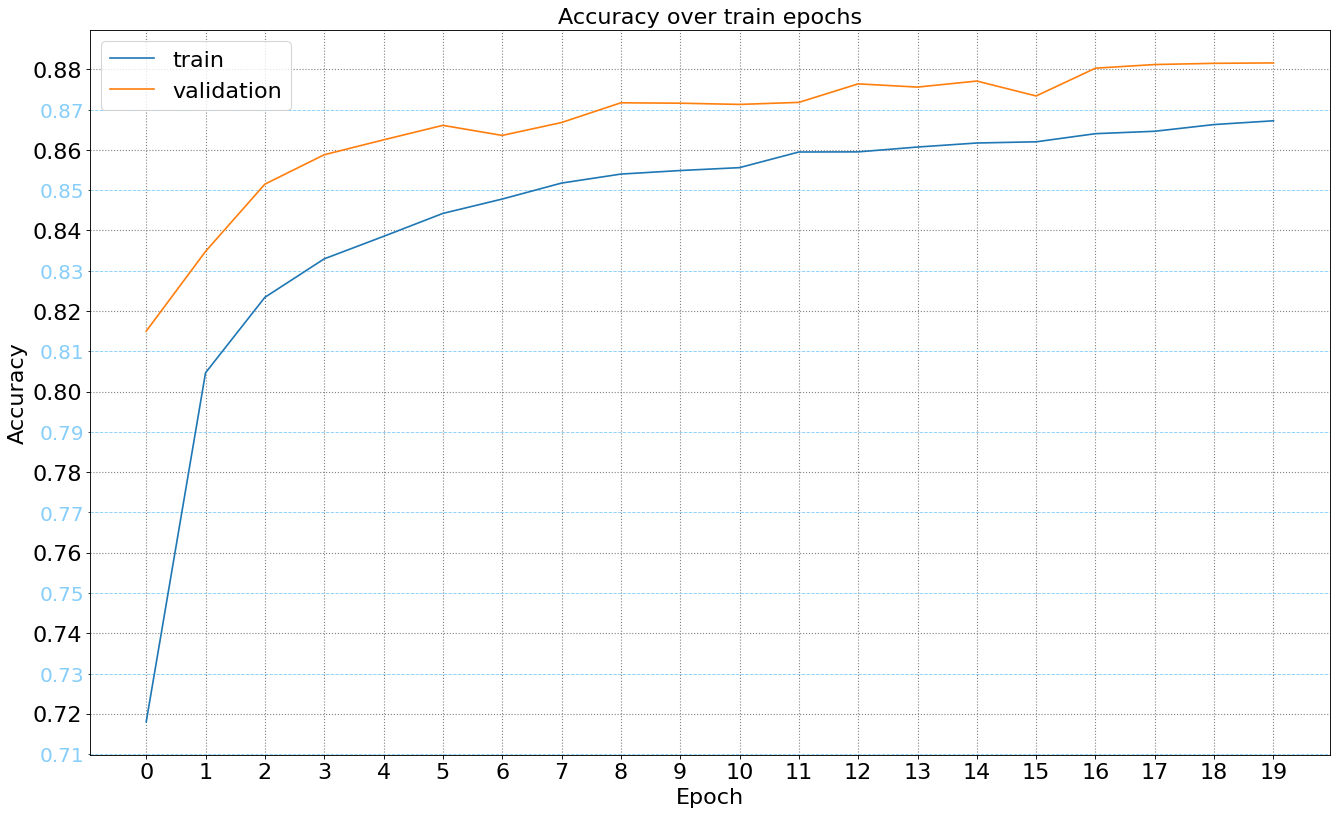

In [50]:
# plt.plot(history_data_aumentada.history['accuracy'], label='train')
# plt.plot(history_data_aumentada.history['val_accuracy'], label='y_lab')
# plt.title('Accuracy over train epochs')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(loc='upper left')
# plt.show()

plot_history(history_data_aumentada)

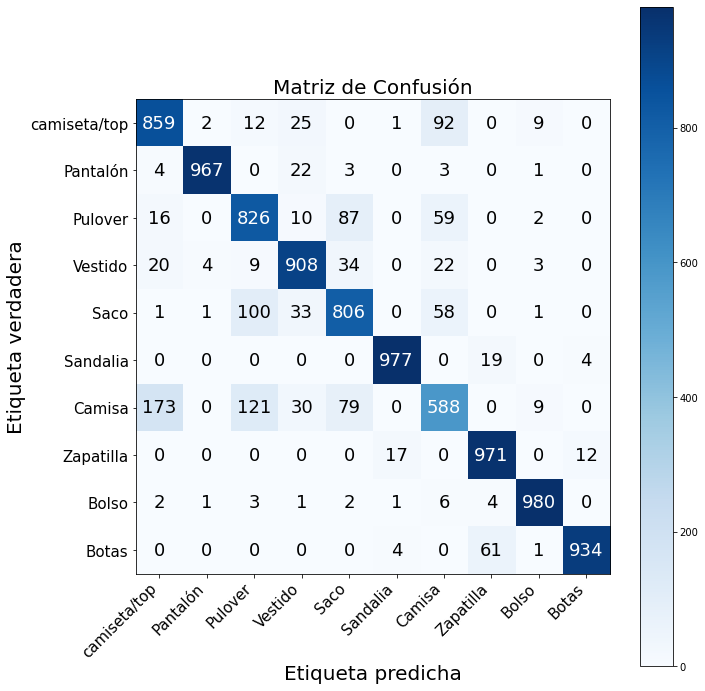

In [51]:
a_p_confusion_matrix(model_da, y_validation, y_lab, a_clases_labels)

In [52]:
predictions_au = model_da.predict(y_validation)

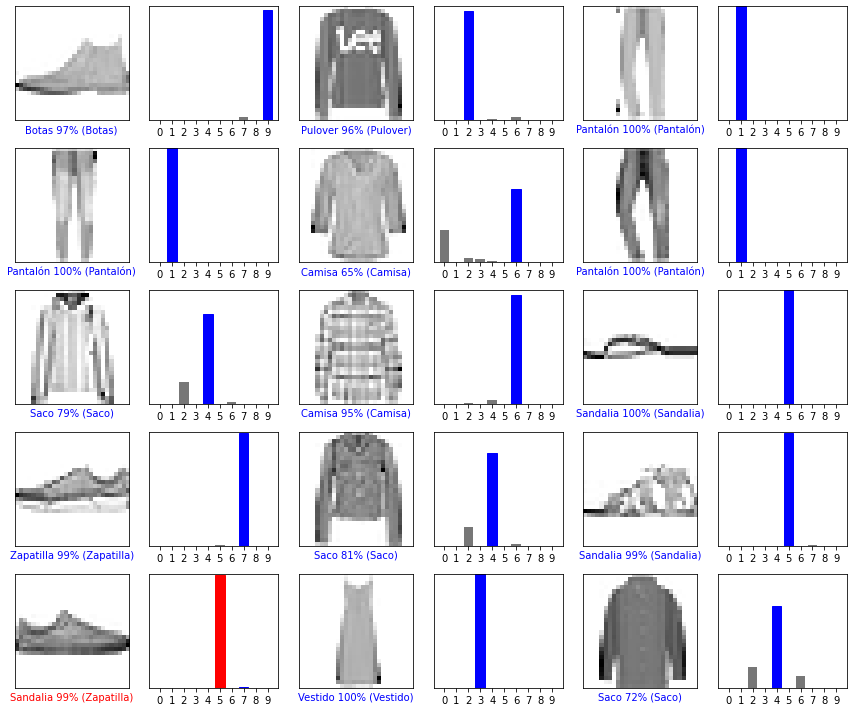

In [53]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_au[i], y_lab, y_validation)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_au[i], y_lab)
plt.tight_layout()
plt.show()

## BatchNormalization

In [54]:
# el shape de los inputs es alto_imagen * ancho_imagen * cantidad_colores
model_bn2 = Sequential([
    
    Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.2),

    Convolution2D(32, 3, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.2),
    
    Convolution2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax'),
])

In [56]:
model_bn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 9, 9, 32)          320       
                                                                 
 batch_normalization (BatchN  (None, 9, 9, 32)         128       
 ormalization)                                                   
                                                                 
 dropout_8 (Dropout)         (None, 9, 9, 32)          0         
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 batch_normalization_1 (Batc  (None, 3, 3, 32)         128       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 3, 3, 32)         

In [57]:
model_bn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',],)

In [58]:
history_bn = model_bn2.fit(x_train_m, x_lab, epochs=30, batch_size=32, validation_data=(y_validation, y_lab))

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5959 - accuracy: 0.7838 - val_loss: 0.3956 - val_accuracy: 0.8527
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4375 - accuracy: 0.8389 - val_loss: 0.3667 - val_accuracy: 0.8598
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4011 - accuracy: 0.8516 - val_loss: 0.3586 - val_accuracy: 0.8642
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3795 - accuracy: 0.8609 - val_loss: 0.3366 - val_accuracy: 0.8765
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3694 - accuracy: 0.8632 - val_loss: 0.3396 - val_accuracy: 0.8703
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3564 - accuracy: 0.8678 - val_loss: 0.3205 - val_accuracy: 0.8818
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3504 - accuracy: 0.8716 - val_loss: 0.3243 - val_accuracy

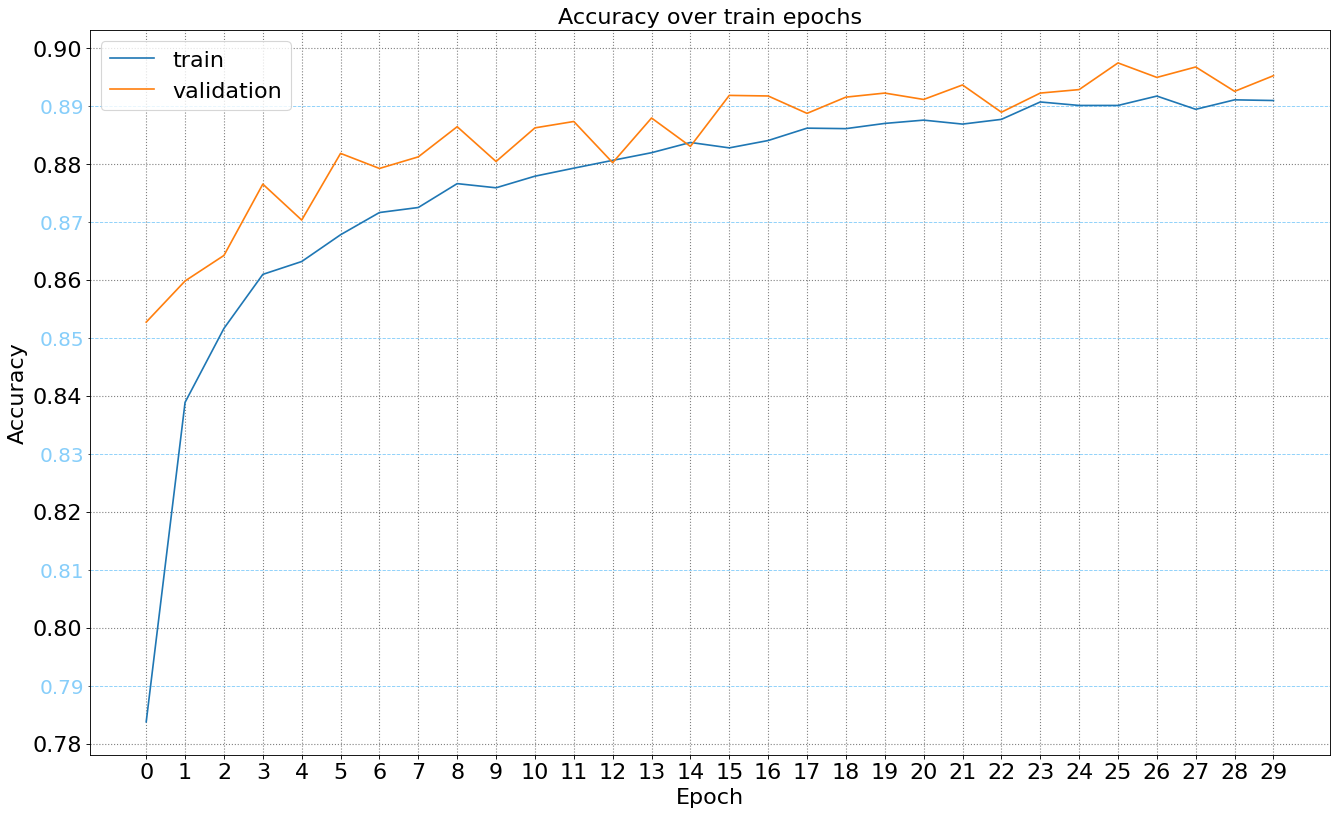

In [59]:
plot_history(history_bn)

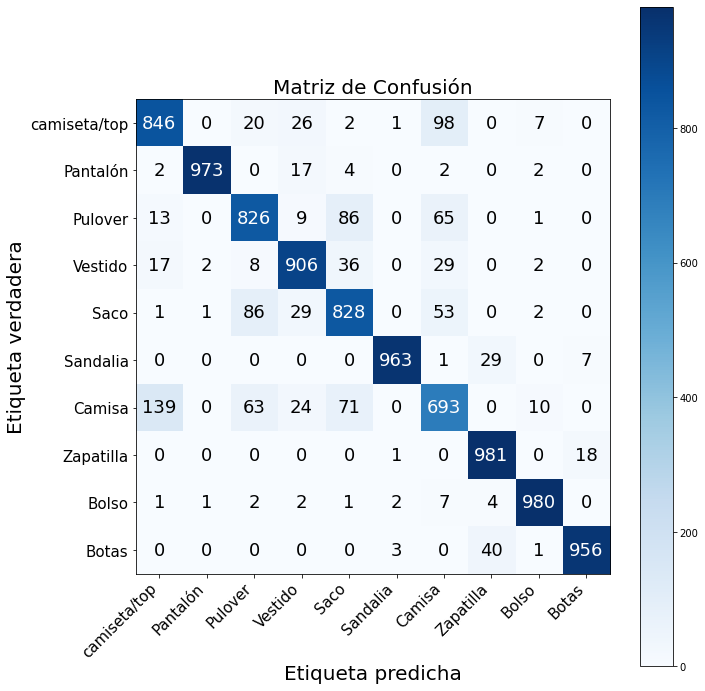

In [60]:
a_p_confusion_matrix(model_bn2, y_validation, y_lab, a_clases_labels)

In [62]:
predictions_bn = model_bn2.predict(y_validation)

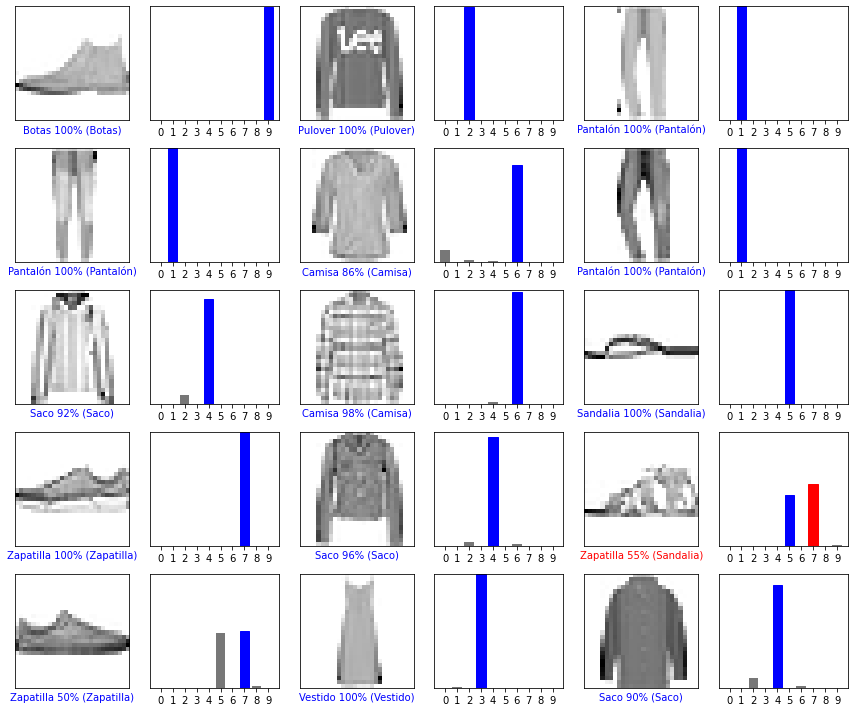

In [63]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_bn[i], y_lab, y_validation)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_bn[i], y_lab)
plt.tight_layout()
plt.show()

<h1></h1>

## Conclusión 

Podemos concluir que la red convolucional aplicando la Tecnica de aumentacion de datos fue el que mejor resultado nos dio 

accuracy: 0,89 para train
accurry: 0,89 para validation




Pero tambien pudimos notar que todos los modelos tenía deficiencia para diferencia las sandalias de las zapatillas